In [1]:
import seaborn as sns
cars = sns.load_dataset("mpg")
cars = cars.dropna()
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


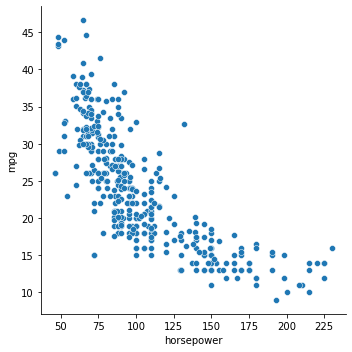

In [2]:
sns.relplot(data=cars,x="horsepower",y="mpg")

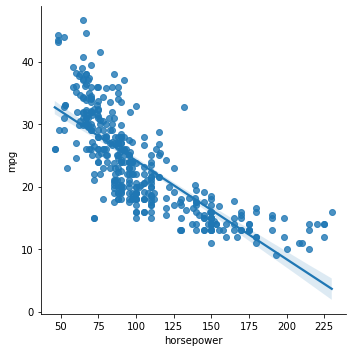

In [3]:
sns.lmplot(data=cars,x="horsepower",y="mpg")

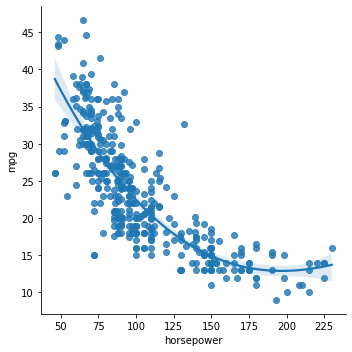

In [4]:
sns.lmplot(data=cars,x="horsepower",y="mpg",order=3)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

X = np.array(cars["horsepower"]).reshape(-1,1)
y = cars["mpg"]
lm = LinearRegression(fit_intercept=False)
cubic = make_pipeline(PolynomialFeatures(degree=3),lm)
cubic.fit(X,y)

print("prediction at hp=100:",cubic.predict([[200]]))

prediction at hp=100: [12.90220247]


In [6]:
cubic[1].coef_

array([ 6.06847849e+01, -5.68850128e-01,  2.07901126e-03, -2.14662591e-06])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler

for deg in range(2,11):
    poly = make_pipeline(PolynomialFeatures(degree=deg),lm)
    poly.fit(X_tr,y_tr)
    print(f"MSE for degree {deg}:",mean_squared_error(y_te,poly.predict(X_te)))

MSE for degree 2: 16.01289461666269
MSE for degree 3: 15.91065108266518
MSE for degree 4: 15.819253166542012
MSE for degree 5: 15.652641443045992
MSE for degree 6: 15.63718971782021
MSE for degree 7: 15.592852998494399
MSE for degree 8: 18.17787140355864
MSE for degree 9: 28.51037146178334
MSE for degree 10: 55.26202163126627


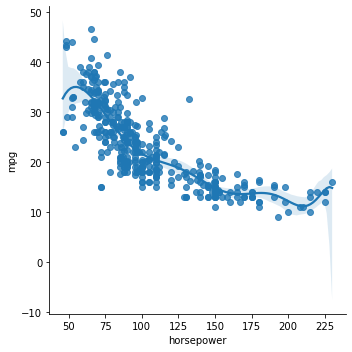

In [9]:
sns.lmplot(data=cars,x="horsepower",y="mpg",order=10)

In [10]:
poly[1].coef_

array([ 1.60016935e-15,  3.68362782e-09,  6.13923385e-12,  2.58590150e-10,
        9.95289236e-09,  2.31091673e-07, -6.79365947e-09,  7.91071778e-11,
       -4.55421898e-13,  1.29560686e-15, -1.45717832e-18])

In [11]:
from sklearn.preprocessing import StandardScaler

X = cars[["horsepower","displacement","cylinders","weight"]]
y = cars["mpg"]
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,random_state=0)

lm = LinearRegression(fit_intercept=True)
pipe = make_pipeline(StandardScaler(),lm)
pipe.fit(X_tr,y_tr)
print(f"MSE for multilinear:",mean_squared_error(y_te,pipe.predict(X_te)))

MSE for multilinear: 18.623882663743327


In [12]:
print(pipe[1].coef_)
print(X.columns)

[-1.58758437  0.19119276 -0.59459762 -4.77122231]
Index(['horsepower', 'displacement', 'cylinders', 'weight'], dtype='object')


In [13]:
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),lm)
pipe.fit(X_tr,y_tr)
print(f"MSE for multilinear:",mean_squared_error(y_te,pipe.predict(X_te)))

MSE for multilinear: 14.794088067764827
